<a href="https://colab.research.google.com/github/cortes28/MultiClass_model_PyTorch/blob/main/NN_classification_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with PyTorch

Classifictation  is a problem of predicting whether something is one thing or other (spam/ham is an example), can be binary or multi-class classification



## 1. Create some classification data and get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

# 1000 samples
samples = 1000

# Create circles
X, y = make_circles(samples,
                    noise = 0.03,
                    random_state =42)



In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 of X: \n{X[:5]}")
print(f"First 5 of y: \n{y[:5]}") # since y is either 0 or 1 -> binary classification


First 5 of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 of y: 
[1 1 1 1 0]


In [4]:
# df of circle data
import pandas as pd
circles = pd.DataFrame({ "X1": X[:, 0],
                         "X2": X[:, 1],
                         "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


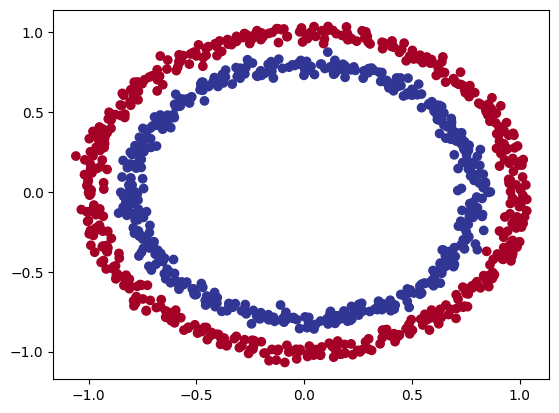

In [5]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:, 1],
            c = y,
            cmap=plt.cm.RdYlBu);

**Note:** The data we're working with is often referred as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.


### 1.1 Check input and output shapes



In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first exmaple of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for X[0]: {X_sample} | y[0]: {y_sample}")
print(f"shape of 1 sample X[0] {X_sample.shape}| y[0]: {y_sample.shape}")
# 2 varialbes for X and though it may be empty for y-> 1 value (scalar)

Values for X[0]: [0.75424625 0.23148074] | y[0]: 1
shape of 1 sample X[0] (2,)| y[0]: ()


### 1.2 Turn data into tensors and create train and test splits



In [8]:
# Turn data into tensor
import torch
torch.__version__

'2.0.1+cu118'

In [9]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
# split data into training and test sets with randomness
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3, # 30% will be used for testing and 70% for training
                                                    random_state = 2)




In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(700, 300, 700, 300)

## 2. Building the model

Build a modle to classify between red and blue dots.

What we want:

1. setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss fucntion and optimizer
4. Create a training and test loop


In [12]:
# import Pytorch and nn here
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu" # if no GPU available, then make it run on CPU
device

'cuda'

Set up the agnostic code and were now using cuda or GPU

1. Subclass the class `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device

In [13]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()


    # 2. Create 2 nn.Linear layers capable of handling the shape of our data
    # self.layer_1 = nn.Linear(in_features  = 2,
    #                          out_features = 5)                  # this variable can be arbritary, it takes in 2 features (from X) and upscales it to 5 features (more of these out_features more chances to learn patterns in the data)
    # self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

    # # with this one, it is the same idea as the top for simple models
    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features = 2, out_features = 5),
    #     nn.Linear(in_features = 5, out_features = 1)
    # )
  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x-> layer_1 -> layer_2 -> output


# 4. Create an object from the class and set it the device we are using
model = CircleModel().to(device)
model

CircleModel()

In [14]:
# Replicate the model above using nn.Sequential()

model = nn.Sequential(
    nn.Linear(in_features  = 2,
              out_features = 5),
    nn.Linear(in_features  = 5,
              out_features  = 1)
).to(device)

model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5992,  0.1180],
                      [-0.2838, -0.6744],
                      [-0.0997,  0.6578],
                      [ 0.1894, -0.0471],
                      [-0.6986, -0.5663]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6787, -0.6985, -0.0457,  0.2297,  0.0993], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1228, -0.0672, -0.2297, -0.3069, -0.0333]], device='cuda:0')),
             ('1.bias', tensor([-0.4080], device='cuda:0'))])

In [16]:
# Make some predictions
with torch.inference_mode():
  untrained_preds = model(X_test.to(device))
  print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
  print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
  print(f"\n\nFirst 10 pred: \n {untrained_preds[:10]}")
  print(f"\nFirst 10 label:\n {y_test[:10]}")

Length of predictions: 300, Shape: torch.Size([300, 1])
Length of test samples: 300, shape: torch.Size([300, 2])


First 10 pred: 
 tensor([[-0.4328],
        [-0.4302],
        [-0.4293],
        [-0.3657],
        [-0.3116],
        [-0.3835],
        [-0.2736],
        [-0.2446],
        [-0.4414],
        [-0.2901]], device='cuda:0')

First 10 label:
 tensor([1., 0., 1., 0., 0., 0., 1., 0., 0., 1.])


In [17]:
X_test[:10], y_test[:10]

(tensor([[ 0.4476,  0.7139],
         [ 0.0323,  1.0018],
         [ 0.5097,  0.6265],
         [ 0.9238, -0.4222],
         [ 0.5607, -0.7662],
         [-0.5030,  0.8730],
         [-0.8228, -0.1464],
         [-0.2324, -0.9309],
         [ 0.8602,  0.4980],
         [ 0.2296, -0.7606]]),
 tensor([1., 0., 1., 0., 0., 0., 1., 0., 0., 1.]))

### 2.1 Setup loss function and optmizer (Note that this is a classification problem)

Which loss function or optimzizer should one use in this case?

Again... this is for a classification problem.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

For classification, we will more likely use binray cross entropy (for choosing between 2) or categorical cross entropy (cross entropy) which has more than 2 output classes.

Loss function is to calculate how wrong our predictions compared to the true value is.

And for optmizers, two of the most common and useful are SGD and Adam, PyTorch has many options for optimizers.

* For the Loss function we're going to use `torch.nn.BECWithLogitsLoss()` -> based on binary classification problems

In [18]:
# Setup loss function
# possible for loss_ln to use nn.BCELoss() but this one reqiures inputs to have gone through the sigmoid activiation function prior to input BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss() = sigmoid activation function builting built-in
optmizer = torch.optim.SGD(params = model.parameters(),
                           lr = 0.1)

In [19]:
# Calculate accuracy  of the model
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # eq compares both y_true and y_pred to see how many are equal to each other...sum() of this and use .item() to have it a single variable
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Training Loop Now

To train our model, we're going to need to build a training loop:

1. Forward Pass
2. Calculate the loss
3. Optimizer the zero grad
4. Loss Backward (back propagation)
5. Optimizer step (gradient descent)


### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **Prediction labels** by either rounding them or taking the argmax().

In [20]:
# View first 5 outputs of the forward pass on the test data

# need to set model to .eval() as well with torch.inference_mode() when testing data.
model.eval()
with torch.inference_mode():
  y_logits = model(X_test.to(device))[:5]

y_logits

tensor([[-0.4328],
        [-0.4302],
        [-0.4293],
        [-0.3657],
        [-0.3116]], device='cuda:0')

In [21]:
y_test[:5]

tensor([1., 0., 1., 0., 0.])

In [22]:
# Use the sigmoid activation functino on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3935],
        [0.3941],
        [0.3943],
        [0.4096],
        [0.4227]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < .5, `y=0` (class 0)

In [23]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# in Full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device))[:5]))

# cehck for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

## 3.2 Building a training and testing loop

In [24]:
len(X_test), len(y_test)

(300, 300)

In [25]:
torch.manual_seed(2)
torch.cuda.manual_seed(2)

# set the number of epochs
epochs = 100

# Put the data target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test,  y_test  = X_test.to(device),  y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model.train()

  # 1. Forward pass
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probs -> pred labels

  # Our current loss function is different from a regressional one where it calculates an MAE -> here it requires logits as inputs

  '''
  if loss_fn was set to nn.BCELoss expects prediction probabilities as input
  loss = loss_fn(torch.sigmoid(y_logits),
                 y_train)
  '''

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,            # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred=y_pred)


  # 3 Optimzer zero grad
  optmizer.zero_grad()

  # 4. loss packward (backpropagation)
  loss.backward()

  # 5 optimizer step (gradient descent)
  optmizer.step()

  ### Testing
  model.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss/acc
    test_loss = loss_fn(test_logits,          # Test predictions
                        y_test)               # Actual values

    test_acc = accuracy_fn(y_true=y_test,     # Actual values
                           y_pred=test_pred)  # Test predictions

    # Print out what is going on
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f} | Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}")


Epoch: 0 | Loss: 0.70783 | Accuracy: 50.14 | Test loss: 0.70743 | Test accuracy: 49.67
Epoch: 10 | Loss: 0.69840 | Accuracy: 50.14 | Test loss: 0.69798 | Test accuracy: 49.67
Epoch: 20 | Loss: 0.69520 | Accuracy: 50.14 | Test loss: 0.69464 | Test accuracy: 49.67
Epoch: 30 | Loss: 0.69409 | Accuracy: 50.14 | Test loss: 0.69347 | Test accuracy: 49.67
Epoch: 40 | Loss: 0.69365 | Accuracy: 50.14 | Test loss: 0.69307 | Test accuracy: 49.67
Epoch: 50 | Loss: 0.69345 | Accuracy: 44.00 | Test loss: 0.69297 | Test accuracy: 45.33
Epoch: 60 | Loss: 0.69334 | Accuracy: 44.57 | Test loss: 0.69298 | Test accuracy: 47.33
Epoch: 70 | Loss: 0.69326 | Accuracy: 50.14 | Test loss: 0.69305 | Test accuracy: 49.67
Epoch: 80 | Loss: 0.69320 | Accuracy: 50.14 | Test loss: 0.69313 | Test accuracy: 49.67
Epoch: 90 | Loss: 0.69315 | Accuracy: 50.14 | Test loss: 0.69322 | Test accuracy: 49.67


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything it seems its as good as guessing.

Have to inspect and make visualizations based on those predictions

Import function called `plot_decision_boundary()`

In [26]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_predictions, plot_decision_boundary



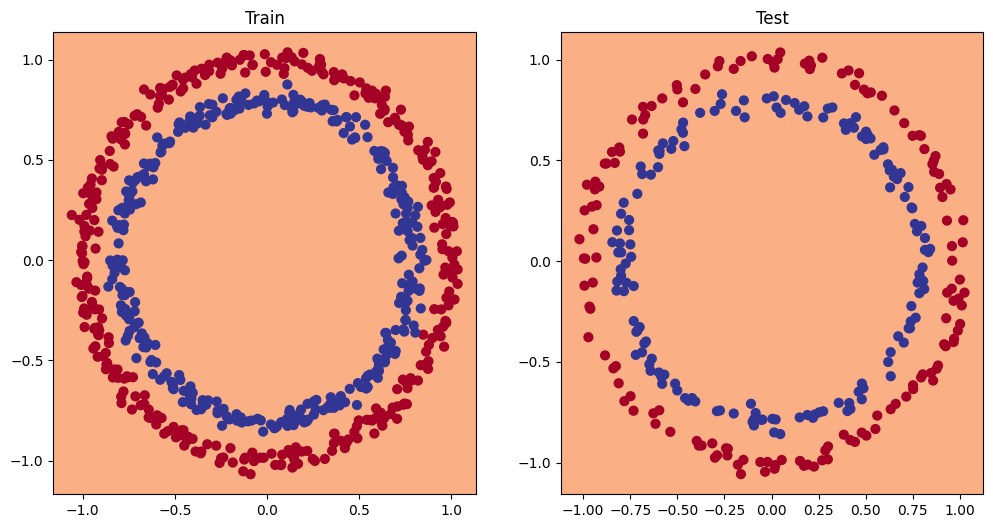

In [27]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
            # 1-num of rows, 2 - number of columns, 3 - of which column it appears on
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give hte model more chances to learn about patterns in the dataset given
* Add more hidden units - go from 5 hidden units to 10 hidden units
* More epochs
* Change the activation functions (currently using sigmoid)
* Changing the learning rate
* Change the loss function

The changes that could improve our model (try a SINGLE change at a time to see if any cause a decrease in performance in the model)
* Adding more hidden units: 5 -> 10
* Increase the number of layers 2 -> 3
* Increase the number of epochs: 100 -> 100


In [28]:
class new_circle_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features =  2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features =  1)       # 1 value is because y is a single value (scalar)

  def forward(self, x):
    # alpha = self.layer_1(x)
    # beta  = self.layer_2(alpha)
    # gamma = self.layer_3(beta)
    return self.layer_3(self.layer_2(self.layer_1(x))) # all in one


model_1 = new_circle_model().to(device)     # set it to the appropiate device
model_1

new_circle_model(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [29]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5815,  0.1208],
                      [-0.3005, -0.6711],
                      [-0.1240,  0.6615],
                      [ 0.1622, -0.0434],
                      [-0.7042, -0.5651]])),
             ('0.bias', tensor([-0.7048, -0.7195, -0.0835,  0.1837,  0.0923])),
             ('1.weight',
              tensor([[-0.1765, -0.2003, -0.2606, -0.2555, -0.0797]])),
             ('1.bias', tensor([-0.2472]))])

In [30]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1622, -0.1683],
                      [ 0.1939, -0.0361],
                      [ 0.3021,  0.1683],
                      [-0.0813, -0.5717],
                      [ 0.1614, -0.6260],
                      [ 0.0929,  0.0470],
                      [-0.1555,  0.5782],
                      [ 0.0472,  0.2932],
                      [ 0.2992, -0.4171],
                      [-0.2718,  0.6800]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.6926, -0.0480, -0.0560,  0.5016, -0.0672,  0.1862, -0.0339, -0.3959,
                      -0.4008, -0.3435], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.2873, -0.2052,  0.0744,  0.2081,  0.0156, -0.1450,  0.1390, -0.1214,
                       -0.0701, -0.1734],
                      [-0.0993, -0.2930,  0.1349,  0.1230,  0.0628,  0.1553,  0.1340,  0.0140,
                        0.0335,  0.0241],
                      [ 0.1687,  0.212

In [31]:
# Loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)


In [32]:
# Training loop for the model

torch.manual_seed(2)
torch.cuda.manual_seed(2)

# Train for longer
epochs = 1000

# put data in the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test,  y_test  = X_test.to(device),  y_test.to(device)

for epoch in range(epochs):
  ### Training process
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/acc
  # logits here as we are using the loss function that requires logits
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backeward (back propagation)
  loss.backward()

  # 5. optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1 Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    # print out what is happening

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f} | Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 0.70386 | Accuracy: 43.43 | Test loss: 0.69959 | Test accuracy: 41.33
Epoch: 100 | Loss: 0.69338 | Accuracy: 48.71 | Test loss: 0.69272 | Test accuracy: 50.67
Epoch: 200 | Loss: 0.69303 | Accuracy: 50.00 | Test loss: 0.69359 | Test accuracy: 45.67
Epoch: 300 | Loss: 0.69294 | Accuracy: 51.14 | Test loss: 0.69403 | Test accuracy: 45.67
Epoch: 400 | Loss: 0.69289 | Accuracy: 50.71 | Test loss: 0.69429 | Test accuracy: 46.00
Epoch: 500 | Loss: 0.69287 | Accuracy: 51.43 | Test loss: 0.69446 | Test accuracy: 46.00
Epoch: 600 | Loss: 0.69286 | Accuracy: 50.86 | Test loss: 0.69458 | Test accuracy: 45.67
Epoch: 700 | Loss: 0.69286 | Accuracy: 51.14 | Test loss: 0.69467 | Test accuracy: 46.67
Epoch: 800 | Loss: 0.69285 | Accuracy: 50.71 | Test loss: 0.69473 | Test accuracy: 47.00
Epoch: 900 | Loss: 0.69285 | Accuracy: 50.14 | Test loss: 0.69478 | Test accuracy: 47.00


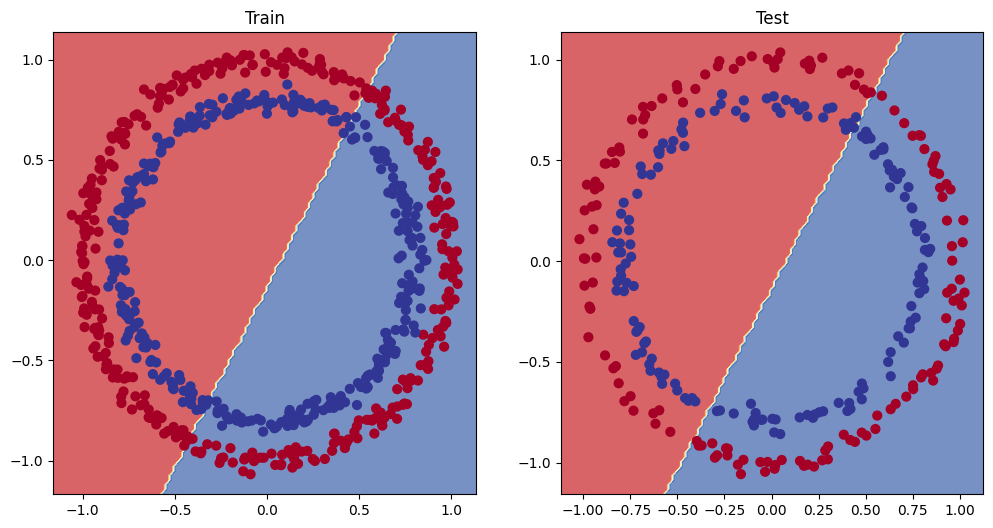

In [33]:
# Visualize what is going on
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
            # 1-num of rows, 2 - number of columns, 3 - of which column it appears on
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 synthesize data to see if this model works with a specific dataset (in this case, we will create data that fits to a linear function [f(x) = mx + b])



In [34]:
weight = 0.5
bias = 0.3
start = 0
end = 2
step = 0.01

# create data
X_reg = torch.arange(start, end, step).unsqueeze(dim = 1)
y_reg = weight * X_reg + bias   # f(x) = mx + b

X_reg[:5], y_reg[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3050],
         [0.3100],
         [0.3150],
         [0.3200]]))

In [35]:
# Split data
from sklearn.model_selection import train_test_split

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg,
                                                    y_reg,
                                                    test_size = 0.2, # 30% will be used for testing and 70% for training
                                                    random_state = 2)



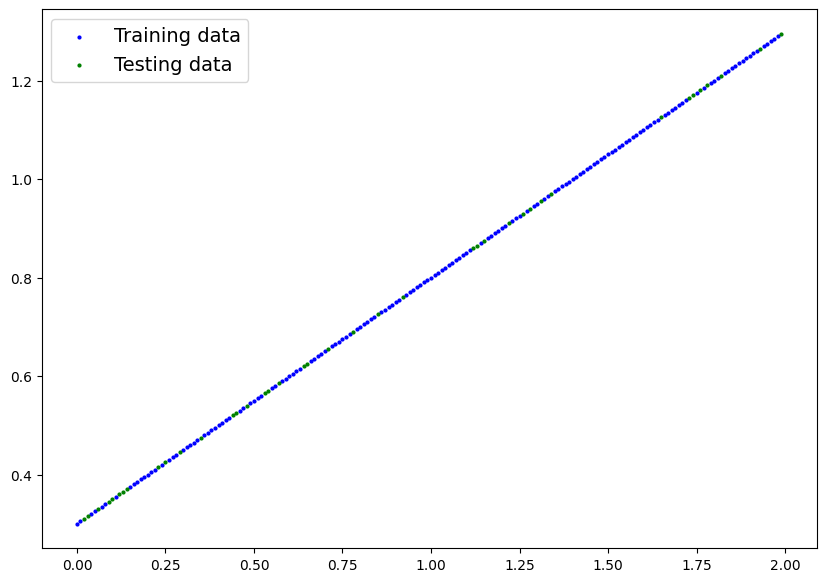

In [36]:
plot_predictions(train_data = X_reg_train,
                 train_labels = y_reg_train,
                 test_data = X_reg_test,
                 test_labels = y_reg_test);

In [37]:
model_1

new_circle_model(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 adjusting model_1 to fit a straight line


In [38]:

# Same architecture as model_1 however using nn.Sequential()
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
loss_fn = nn.L1Loss()                  # CHANGED as we are doing a linear regression here
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.1)




In [40]:
# Train model
torch.manual_seed(2)
torch.cuda.manual_seed(2)

epoch = 1000

# put data in target device
X_reg_train, y_reg_train = X_reg_train.to(device), y_reg_train.to(device)
X_reg_test,  y_reg_test  = X_reg_test.to(device),  y_reg_test.to(device)

for epoch in range(epochs):

  y_pred = model_2(X_reg_train)
  loss = loss_fn(y_pred, y_reg_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Test the model
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_reg_test)
    test_loss = loss_fn(test_pred, y_reg_test)

  # Print out the model metric
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 0 | Loss: 1.36971 | Test loss: 0.70941
Epoch: 10 | Loss: 0.06076 | Test loss: 0.25540
Epoch: 20 | Loss: 0.12146 | Test loss: 0.40173
Epoch: 30 | Loss: 0.22279 | Test loss: 0.19469
Epoch: 40 | Loss: 0.25237 | Test loss: 0.11399
Epoch: 50 | Loss: 0.26861 | Test loss: 0.05738
Epoch: 60 | Loss: 0.32470 | Test loss: 0.03421
Epoch: 70 | Loss: 0.04626 | Test loss: 0.14873
Epoch: 80 | Loss: 0.12950 | Test loss: 0.18278
Epoch: 90 | Loss: 0.16407 | Test loss: 0.13589
Epoch: 100 | Loss: 0.19966 | Test loss: 0.08516
Epoch: 110 | Loss: 0.10432 | Test loss: 0.15550
Epoch: 120 | Loss: 0.21091 | Test loss: 0.01469
Epoch: 130 | Loss: 0.15984 | Test loss: 0.05457
Epoch: 140 | Loss: 0.06030 | Test loss: 0.15708
Epoch: 150 | Loss: 0.15035 | Test loss: 0.05464
Epoch: 160 | Loss: 0.14325 | Test loss: 0.04824
Epoch: 170 | Loss: 0.12992 | Test loss: 0.05907
Epoch: 180 | Loss: 0.12236 | Test loss: 0.05973
Epoch: 190 | Loss: 0.10308 | Test loss: 0.06845
Epoch: 200 | Loss: 0.10786 | Test loss: 0.06454
Epo

In [41]:
len(X_reg_train), len(y_reg_train), len(X_reg_test), len(y_reg_test)

(160, 160, 40, 40)

In [42]:
# Turn on evaluation mode

model_2.eval()
y_preds = None

with torch.inference_mode():
  y_preds = model_2(X_reg_test)

len(y_preds)

40

In [43]:
y_preds

tensor([[0.7877],
        [0.4097],
        [1.1065],
        [1.1840],
        [1.1566],
        [0.6647],
        [0.3231],
        [0.5235],
        [0.8014],
        [0.4370],
        [0.3322],
        [0.6966],
        [0.3368],
        [0.8515],
        [1.0701],
        [0.2867],
        [0.4780],
        [0.2912],
        [0.7922],
        [0.3413],
        [0.3823],
        [0.3914],
        [0.3049],
        [0.8879],
        [1.0291],
        [1.0655],
        [0.4825],
        [0.5736],
        [0.4962],
        [0.8332],
        [1.0883],
        [0.5691],
        [0.3186],
        [0.5372],
        [0.6328],
        [0.6010],
        [0.8606],
        [1.0792],
        [0.8742],
        [0.5190]], device='cuda:0')

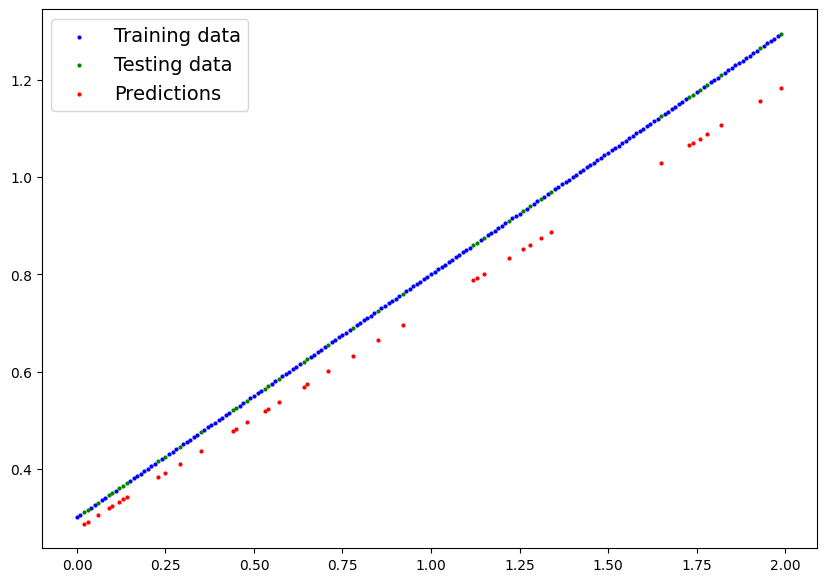

In [44]:
 # Plot data
"""
Plots linear training data and test data and compares predictions.
"""
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_reg_train.cpu(), y_reg_train.cpu(), c="b", s=4, label="Training data")

# Plot test data in green
plt.scatter(X_reg_test.cpu(), y_reg_test.cpu(), c="g", s=4, label="Testing data")

if y_preds is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(X_reg_test.cpu(), y_preds.cpu(), c="r", s=4, label="Predictions")

# Show the legend
plt.legend(prop={"size": 14})


### Though it does not fit entirely well, the loss is compareably lower than the dataset that we started -> Look at the design of the model. The model should more likely not be linear

## 6 Changing it to a non-linear model

Draw patterns from a bunch of straight and non-straight lines

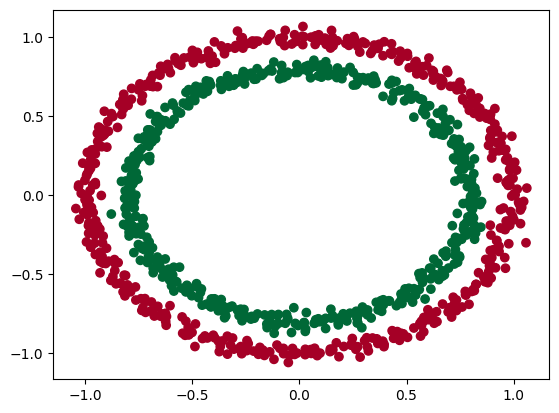

In [45]:
### 6.1 Recreating non-linear data (red and blue circles)
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

samples = 1000

X, y = make_circles(samples,
                    noise        = 0.03,
                    random_state = 2)

#           1st col  2nd col   y    color

plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlGn)


In [46]:
import torch
from sklearn.model_selection import train_test_split

# convert to tensors and set it to proper device
X = torch.from_numpy(X).type(torch.float32).to(device)
y = torch.from_numpy(y).type(torch.float32).to(device)

# Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 2)

X_train[:10], y_train[:10]


(tensor([[ 1.0013,  0.0067],
         [ 0.7576,  0.1040],
         [-0.9515, -0.1624],
         [ 0.2966,  0.7434],
         [-0.6031,  0.7747],
         [-0.9424, -0.1949],
         [-0.7595,  0.2185],
         [-0.1444,  0.7879],
         [ 0.1569,  0.9452],
         [ 0.7499,  0.6823]], device='cuda:0'),
 tensor([0., 1., 0., 1., 0., 0., 1., 1., 0., 0.], device='cuda:0'))

### 6.2 Building a model with non-linearity

* Linear = straight function f(x) = mx + b
* Non-Linear = non-straight lines -> polynomials, log. functions, etc.

In [47]:
# Build a model with non-linear activation function
from torch import nn

# Modification # 2 was adding more features within the layers (10 -> 15)
class CircleModel_V2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 15)
    self.layer_2 = nn.Linear(in_features = 15, out_features = 15)
    self.layer_3 = nn.Linear(in_features = 15, out_features = 1)
    self.relu = nn.ReLU() # the current modification -> relu is a non-linear activation function

  def forward(self, x:torch.Tensor):
    # How to add the non-linear function
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModel_V2().to(device)
model_3


CircleModel_V2(
  (layer_1): Linear(in_features=2, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=15, bias=True)
  (layer_3): Linear(in_features=15, out_features=1, bias=True)
  (relu): ReLU()
)

In [48]:
# setup loss and optimizer
# Loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.1)


### Train model now with ReLU which is a non-linear function

In [49]:
torch.manual_seed(2)
torch.cuda.manual_seed(2)

# Loop through data

epochs = 1000


for epoch in range(epochs):
  ### Training now...
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred   = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> predictions

  # Calculate loss
  loss = loss_fn(y_logits, y_train)  # BCEWithLogitsLoss (takes in logits as first input)
  acc  = accuracy_fn(y_true = y_train,
                 y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. step the optimizer
  optimizer.step()


  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred   = torch.round(torch.sigmoid(test_logits))

    #print(f"test logit shape: {test_logits.shape} | test_pred shape: {y_test.shape}")

    test_loss = loss_fn(test_logits, y_test)
    test_acc  = accuracy_fn(y_true = y_test,
                            y_pred = test_pred)

    # Print out what's going on...
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f} | Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69466 | Accuracy: 50.00 | Test loss: 0.69364 | Test accuracy: 50.00
Epoch: 100 | Loss: 0.69259 | Accuracy: 51.38 | Test loss: 0.69176 | Test accuracy: 49.50
Epoch: 200 | Loss: 0.69078 | Accuracy: 52.88 | Test loss: 0.69003 | Test accuracy: 53.00
Epoch: 300 | Loss: 0.68867 | Accuracy: 55.50 | Test loss: 0.68814 | Test accuracy: 54.00
Epoch: 400 | Loss: 0.68563 | Accuracy: 56.62 | Test loss: 0.68557 | Test accuracy: 55.50
Epoch: 500 | Loss: 0.68072 | Accuracy: 63.25 | Test loss: 0.68166 | Test accuracy: 65.00
Epoch: 600 | Loss: 0.67249 | Accuracy: 65.75 | Test loss: 0.67555 | Test accuracy: 65.00
Epoch: 700 | Loss: 0.65891 | Accuracy: 66.88 | Test loss: 0.66541 | Test accuracy: 64.00
Epoch: 800 | Loss: 0.63550 | Accuracy: 70.38 | Test loss: 0.64593 | Test accuracy: 66.50
Epoch: 900 | Loss: 0.59136 | Accuracy: 81.88 | Test loss: 0.60254 | Test accuracy: 81.50


### 6.4 Evaluate model trainied with non-linear functions

In [50]:
# Predictions with final model
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 1., 0., 0., 1., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 1., 0., 0., 1., 0., 1., 0.], device='cuda:0'))

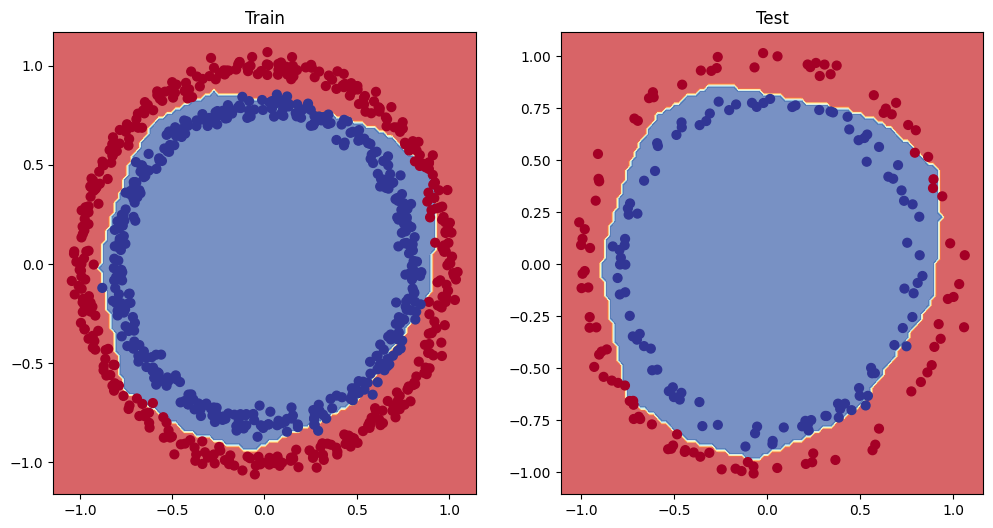

In [51]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

The particular tool would be linear & non-linear functions

In [52]:
# Tensor
A = torch.arange(-10, 10, 1, dtype = torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

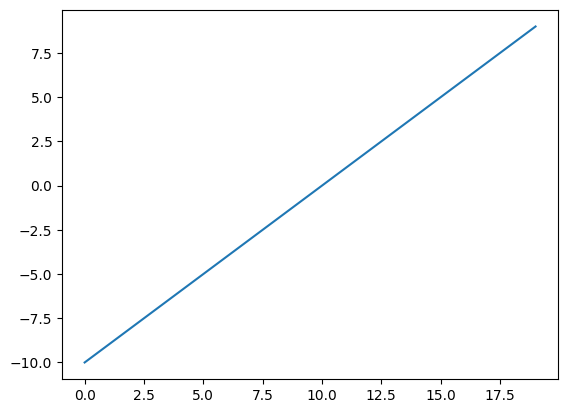

In [53]:
plt.plot(A);

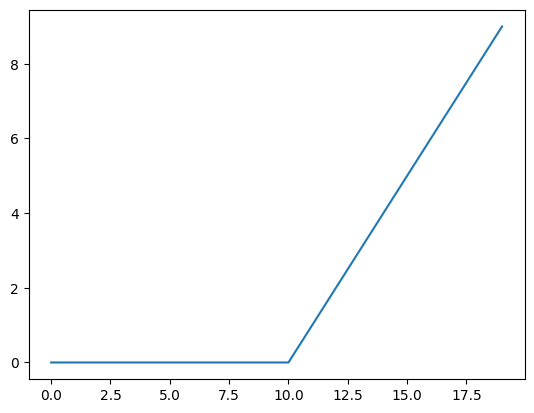

In [54]:
plt.plot(torch.relu(A))

In [55]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

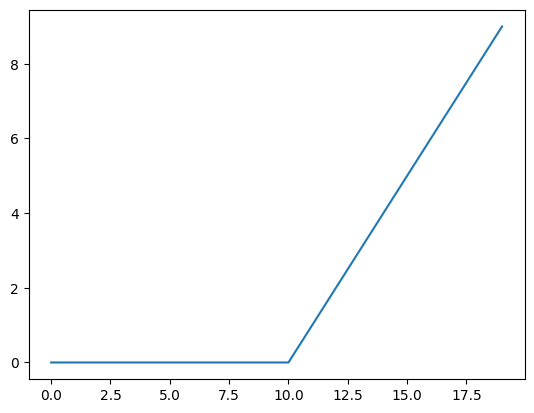

In [56]:
# Plot ReLU activiation function
plt.plot(relu(A))

In [57]:
# create our own function for sigmoid
def sigmoid(x : torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

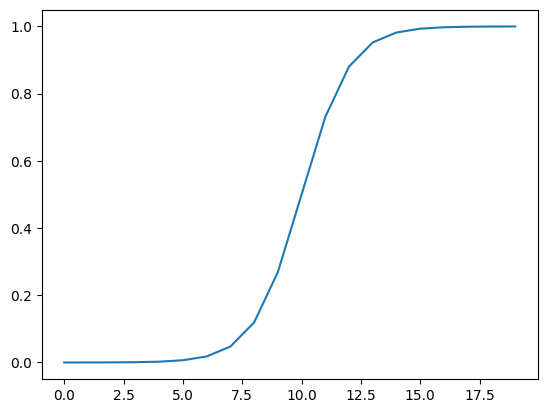

In [58]:
plt.plot(torch.sigmoid(A))

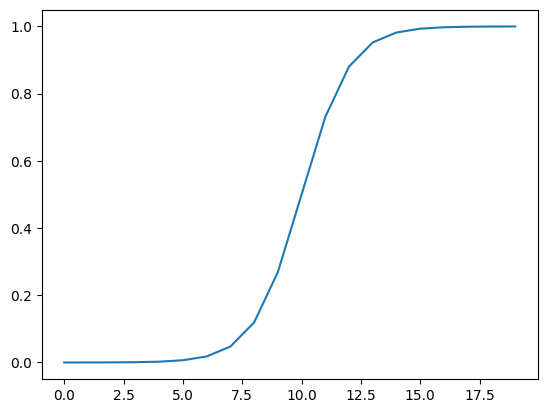

In [59]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification model

* Binary classification = one or the other (spam/ham is an example)

* Multi-class classificaiton = more than one thing or another (pizza vs sushi vs tacos)

### Creaing a toy multi-class dataset

Device that will be used: cuda


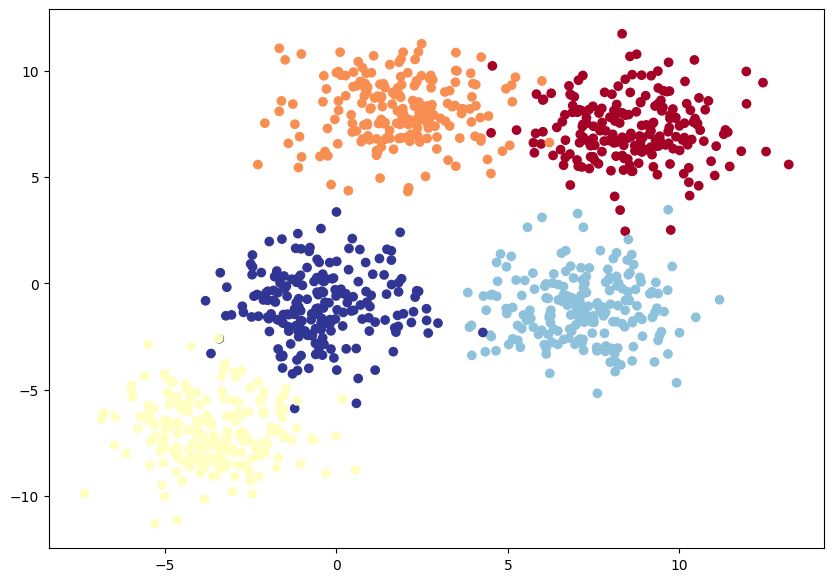

In [77]:
# import the libraries needed
import torch
import matplotlib.pyplot     as plt
from sklearn.datasets        import make_blobs # from sklearn to make a small dataset to try a multiclassification problem
from sklearn.model_selection import train_test_split

NUM_CLASSES  = 5
NUM_FEATURES = 2
RDM_SEED     = 70

# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device that will be used: {device}")

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,           # give clusters some noise
                            random_state = RDM_SEED)

# 2. Turn data into tensors and set it to the appropiate device
X_blob = torch.from_numpy(X_blob).type(torch.float32).to(device)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor).to(device)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size   = 0.2,
                                                                        random_state = 2)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:, 0].cpu(), X_blob[:, 1].cpu(), c = y_blob.cpu(), cmap = plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch



In [78]:
# Build a multi-class classification model
class MultiClassModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """ Initialized the multi-class classification model:

      Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

      //

      //
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features  = input_features,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features  = hidden_units,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features  = hidden_units,
                  out_features = output_features)
    )

  def forward(self, x : torch.Tensor):
    return self.linear_layer_stack(x)

# Create an instance of MultiClassModule and set it to target device
model_4 = MultiClassModel(input_features = 2,
                          output_features = 5,
                          hidden_units = 8).to(device)

### 8.3 Create a loss function and optimizer for multi-class classification


In [79]:
# Create a loss fucntion for a multi-class classification
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1) # Learning rate (hyperparameter I may look later to see if needed)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

 To evaluate and train our model, we need to convert our model's outputs (logits) to prediction probabilities and then prediction labels

 Logits (raw output) -> prediction probabilities (using `torch.softmax`)-> prediction labels (take argmax of prediction probabilities)


In [80]:
# (No training done yet) get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-2.3452, -1.7186, -3.4664, -2.3791,  0.4416],
        [-1.0970, -1.3609, -1.5289, -0.9111,  0.3132],
        [-2.7440, -1.6142, -3.9153, -2.7221,  0.6441],
        [-0.8844, -1.0092, -0.9712, -0.5457,  0.4585],
        [-1.3882, -1.0838, -1.7027, -1.1291,  0.4906],
        [-0.4260, -0.5925, -0.0691, -0.1677,  0.2244],
        [-0.6301, -1.0832, -0.7052, -0.3249,  0.3503],
        [-0.3464, -0.5277, -0.0244, -0.1720,  0.1924],
        [-2.5579, -1.5184, -3.7101, -2.6492,  0.5234],
        [-0.3872, -0.5516, -0.0193, -0.1606,  0.1735]], device='cuda:0')

In [81]:
y_blob_test[:10]

tensor([0, 1, 0, 3, 3, 4, 1, 4, 0, 2], device='cuda:0')

In [82]:
# Convert our model's logits output to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-2.3452, -1.7186, -3.4664, -2.3791,  0.4416],
        [-1.0970, -1.3609, -1.5289, -0.9111,  0.3132],
        [-2.7440, -1.6142, -3.9153, -2.7221,  0.6441],
        [-0.8844, -1.0092, -0.9712, -0.5457,  0.4585],
        [-1.3882, -1.0838, -1.7027, -1.1291,  0.4906]], device='cuda:0')
tensor([[0.0490, 0.0918, 0.0160, 0.0474, 0.7958],
        [0.1296, 0.0995, 0.0841, 0.1560, 0.5308],
        [0.0285, 0.0883, 0.0088, 0.0292, 0.8451],
        [0.1245, 0.1099, 0.1141, 0.1747, 0.4768],
        [0.0915, 0.1241, 0.0668, 0.1186, 0.5990]], device='cuda:0')


In [83]:
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0')

In [84]:
torch.argmax(y_pred_probs[0])

tensor(4, device='cuda:0')

In [85]:
# Convert the current predictions of the model to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0')

## 8.5 Creating training loop and testing loop for a multi-class PyTorch model


In [86]:
y_blob_train.dtype

torch.int64

In [93]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)

  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_preds)

  # print what is going on
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f} | Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}")


Epoch: 0 | Loss: 0.0891 | Accuracy: 97.75 | Test loss: 0.07637 | Test accuracy: 98.50
Epoch: 10 | Loss: 0.0872 | Accuracy: 97.88 | Test loss: 0.07473 | Test accuracy: 98.50
Epoch: 20 | Loss: 0.0855 | Accuracy: 97.88 | Test loss: 0.07324 | Test accuracy: 98.50
Epoch: 30 | Loss: 0.0839 | Accuracy: 97.88 | Test loss: 0.07189 | Test accuracy: 98.50
Epoch: 40 | Loss: 0.0825 | Accuracy: 98.00 | Test loss: 0.07065 | Test accuracy: 98.50
Epoch: 50 | Loss: 0.0811 | Accuracy: 98.12 | Test loss: 0.06952 | Test accuracy: 98.50
Epoch: 60 | Loss: 0.0799 | Accuracy: 98.12 | Test loss: 0.06849 | Test accuracy: 98.50
Epoch: 70 | Loss: 0.0787 | Accuracy: 98.12 | Test loss: 0.06754 | Test accuracy: 98.50
Epoch: 80 | Loss: 0.0776 | Accuracy: 98.12 | Test loss: 0.06665 | Test accuracy: 98.50
Epoch: 90 | Loss: 0.0766 | Accuracy: 98.12 | Test loss: 0.06583 | Test accuracy: 98.50


### 8.6 Making and evaluating the PyTorch multi-class model

In [94]:
# Predictions
model_4.eval()
with torch.inference_mode():
  # the raw output of our model are logits
  y_logits = model_4(X_blob_test)

# First 10 predictions (raw output)
y_logits[:10]

tensor([[  7.3893,   4.5815, -21.3916,  -8.5502,  -7.2944],
        [  3.4158,   6.6846, -10.4211,  -8.1323,  -1.2683],
        [  6.7885, -11.3960, -25.5691,   3.4423,  -7.3210],
        [  0.1784, -13.9052, -10.4347,   7.4719,   1.5792],
        [  1.5050, -14.8413, -13.1847,   7.8882,  -0.0370],
        [ -3.9135,  -6.8826,   4.0326,  -4.6356,   1.8979],
        [  0.3732,   3.4594,  -3.5378,  -4.8310,   1.8415],
        [ -1.9858,  -3.7131,   0.4367,  -2.2082,   3.5343],
        [  7.0138,  -4.3194, -23.5912,  -1.9772,  -7.3089],
        [ -3.7070,  -5.8379,   4.1348,  -5.2667,   1.8723]], device='cuda:0')

In [95]:
# Go from logits -> prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[9.4310e-01, 5.6903e-02, 2.9867e-13, 1.1275e-07, 3.9584e-07],
        [3.6645e-02, 9.6302e-01, 3.5869e-08, 3.5377e-07, 3.3863e-04],
        [9.6598e-01, 1.2233e-08, 8.5551e-15, 3.4018e-02, 7.1992e-07],
        [6.7765e-04, 5.1826e-10, 1.6663e-08, 9.9657e-01, 2.7501e-03],
        [1.6862e-03, 1.3422e-10, 7.0350e-10, 9.9795e-01, 3.6079e-04],
        [3.1645e-04, 1.6249e-05, 8.9380e-01, 1.5371e-04, 1.0572e-01],
        [3.6684e-02, 8.0311e-01, 7.3444e-04, 2.0153e-04, 1.5927e-01],
        [3.8035e-03, 6.7611e-04, 4.2879e-02, 3.0451e-03, 9.4960e-01],
        [9.9986e-01, 1.1967e-05, 5.1093e-14, 1.2451e-04, 6.0210e-07],
        [3.5576e-04, 4.2236e-05, 9.0530e-01, 7.4778e-05, 9.4227e-02]],
       device='cuda:0')

In [96]:
y_blob_test

tensor([0, 1, 0, 3, 3, 4, 1, 4, 0, 2, 1, 0, 1, 1, 0, 2, 4, 0, 4, 2, 2, 2, 1, 4,
        4, 0, 1, 0, 4, 1, 1, 2, 0, 4, 3, 3, 4, 2, 2, 4, 0, 4, 2, 3, 0, 4, 1, 0,
        1, 0, 4, 1, 1, 2, 1, 4, 1, 4, 0, 2, 2, 1, 0, 1, 1, 4, 3, 0, 3, 0, 2, 2,
        2, 4, 4, 1, 2, 0, 1, 3, 4, 3, 3, 4, 1, 4, 0, 0, 1, 1, 4, 0, 2, 3, 1, 1,
        1, 1, 0, 0, 0, 1, 3, 4, 0, 2, 3, 0, 4, 3, 1, 0, 0, 0, 2, 4, 4, 0, 3, 4,
        3, 4, 0, 3, 4, 3, 2, 2, 3, 2, 1, 3, 1, 0, 2, 3, 3, 4, 3, 0, 3, 4, 3, 1,
        0, 3, 4, 1, 0, 4, 3, 2, 3, 1, 3, 3, 4, 4, 0, 0, 3, 2, 0, 3, 4, 1, 3, 3,
        1, 4, 0, 3, 0, 0, 0, 1, 4, 3, 3, 1, 4, 4, 1, 3, 4, 3, 2, 2, 4, 2, 2, 1,
        2, 1, 2, 3, 0, 3, 0, 4], device='cuda:0')

In [97]:
# Go from pred probs to pred labels (Now this looks more like y_blob_test)
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:10]

tensor([0, 1, 0, 3, 3, 2, 1, 4, 0, 2], device='cuda:0')

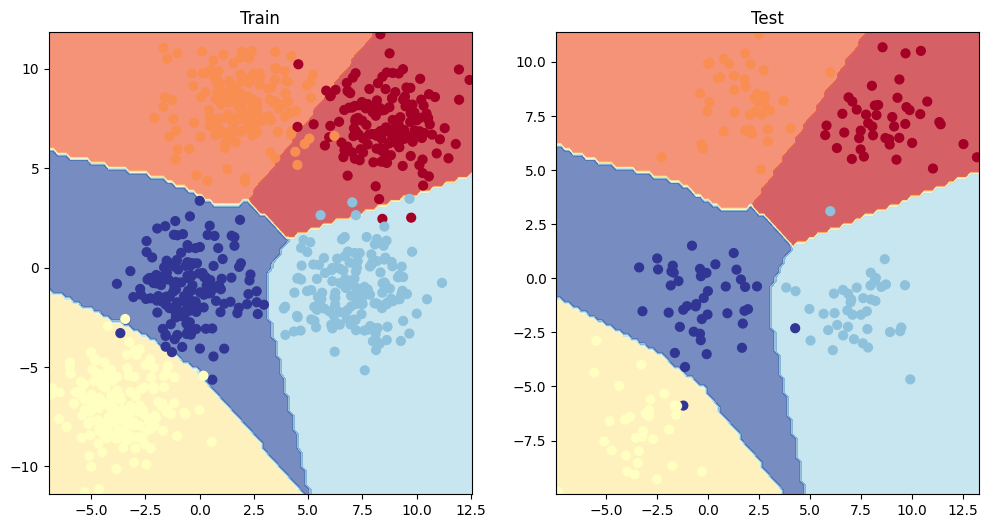

In [98]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics that we can use to evaluate the classification model

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [99]:
!pip3 install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.8/728.8 kB 13.2 MB/s eta 0:00:00


In [101]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=5).to(device)

# calculate accuracy of model 4
torchmetric_accuracy(y_preds, y_blob_test)


tensor(0.9850, device='cuda:0')

# Saving the model

In [102]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'MC_model.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving the model to {MODEL_SAVE_PATH}")
torch.save(obj = model_4.state_dict(),
           f= MODEL_SAVE_PATH)

Saving the model to models/MC_model.pt
